# Задание

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from IPython.core.interactiveshell import InteractiveShell

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


## 1.Траты по картам

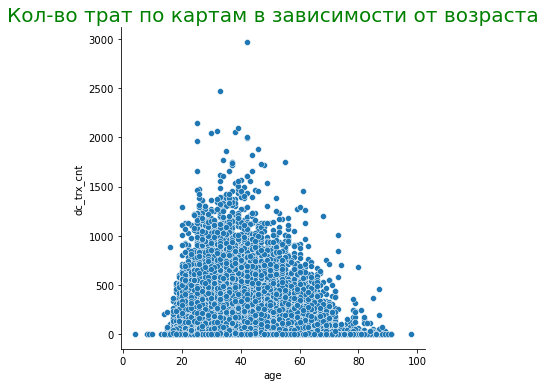

In [3]:
sns.relplot(x='age', y='dc_trx_cnt', data=df, kind='scatter')
plt.title('Кол-во трат по картам в зависимости от возраста', size=20, color='g');

Резкий рост кол-ва трат по картам приходится примерно на 18 лет. Можно сделать вывод о том, что банки хорошо выполняют свою работу по продаже продукта "Банковские карты" и осуществляют выдачу примерно при достижении совершеннолетия.

## 2. Распределение людей по городам с ипотеками

In [4]:
df['is_ipoteka'] = (df.ml_balance > 0).replace({False:0, True:1})

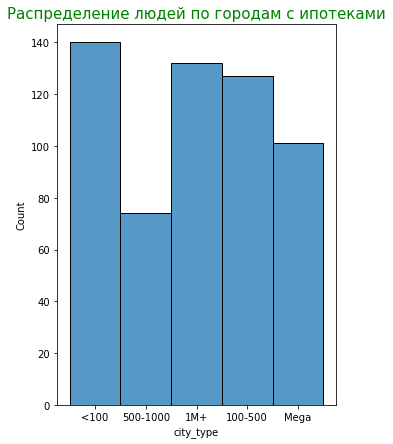

In [5]:
plt.figure(figsize=(5,7))
sns.histplot(data=df.query('is_ipoteka > 0'), x='city_type');
plt.title('Распределение людей по городам с ипотеками', size=15, color='g');

Больше всего людей берут ипотеку в городах с населением меньше 100 

## 3. Сумма ипотеки от возраста

<Figure size 720x864 with 0 Axes>

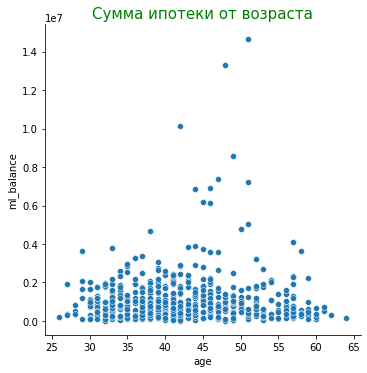

In [6]:
plt.figure(figsize=(10,12))
sns.relplot(
    x='age',
    y='ml_balance',
    data=df.query('is_ipoteka > 0')
);
plt.title('Сумма ипотеки от возраста', size=15, color='g');

Чаще всего ипотеку берут до достижения 40 лет

## 4. Сумма ипотеки от возраста

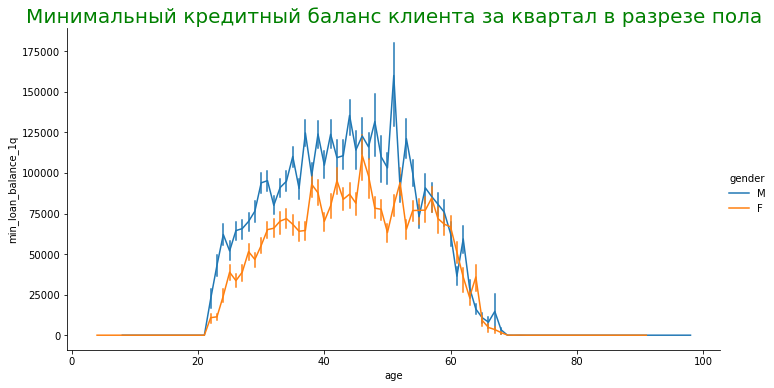

In [35]:
InteractiveShell.ast_node_interactivity = "all"
sns.relplot(
    x='age', 
    y='min_loan_balance_1q', 
    hue='gender',
    data= df, 
    aspect = 2,
    kind='line',
    err_style="bars",
    ci=50)
plt.title('Минимальный кредитный баланс клиента за квартал в разрезе пола', size=20, color='g');

## 6.Минимальный баланс клиентов по потреб. кредитам за квартал в разрезе пола

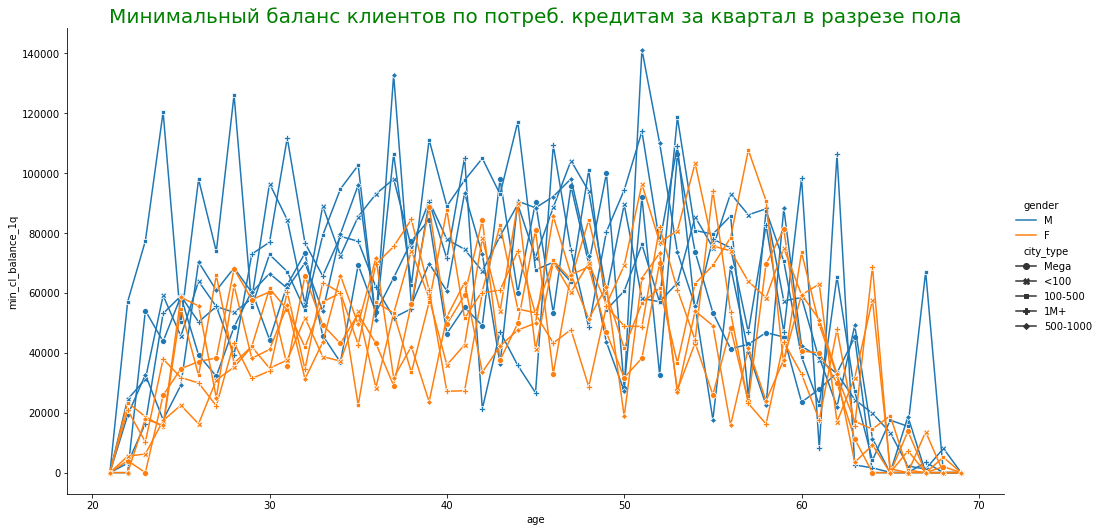

In [23]:
sns.relplot(
    x='age',
    y='min_cl_balance_1q', 
    hue='gender', 
    style='city_type', 
    dashes=False, 
    markers=True,
    aspect = 2,
    height = 7,
    data=df.query("70 > age > 20"),
    kind='line',
    ci=None)
plt.title('Минимальный баланс клиентов по потреб. кредитам за квартал в разрезе пола', size=20, color='g');

## 7. Количество клиентов относительно типов городов

Text(0.5, 1.0, 'Количество клиентов относительно типов городов')

Text(0.5, 0, 'Типы городов')

Text(0, 0.5, 'Количество клиентов')

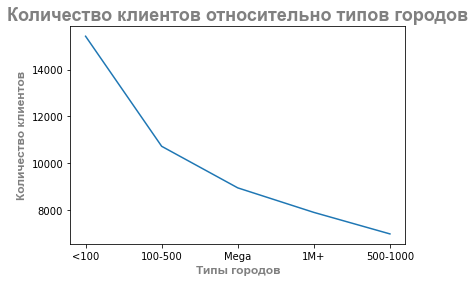

In [34]:
title_dict = {'fontsize':18, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Arial'}
labels_dict = {'fontsize':12, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Arial'}

city_clientage = df.groupby('city_type')['age'].count().sort_values(ascending=False)
plt.plot(city_clientage)
plt.title('Количество клиентов относительно типов городов',fontdict=title_dict)
plt.xlabel('Типы городов',fontdict=labels_dict)
plt.ylabel('Количество клиентов',fontdict=labels_dict)
plt.show()

Больше всего клиентов приходится на города с населением <100